In [24]:
import keras
from keras.utils import plot_model
from keras.models import Model
from keras.layers import *
from keras.optimizers import RMSprop
import os.path
from os import path
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
from PIL import Image
import numpy as np
print("Downloading pretrained model:")
!gdown --id 1-yatFvHQokK7fHaaaAMO2TkvlgkUnXhw
#Layers and Output
visible = Input(shape=(500, 500,3))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
model.compile(
    optimizer=RMSprop(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"],
)
model.load_weights("/content/model.h5")
print("Done!")

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-yatFvHQokK7fHaaaAMO2TkvlgkUnXhw
To: /content/model.h5
100% 9.59M/9.59M [00:00<00:00, 48.6MB/s]
Done!


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1L5TMRMn78eTn7Z1joS2vfCCtadCKG4Mu
To: /content/ISIC_0010860.jpg
100% 190k/190k [00:00<00:00, 5.07MB/s]


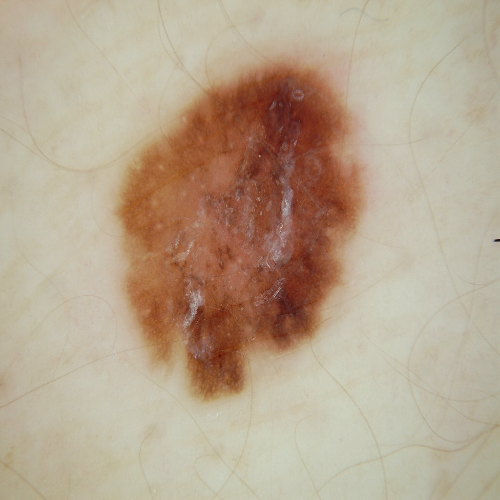

In [28]:
import cv2
from google.colab.patches import cv2_imshow
!gdown --id 1L5TMRMn78eTn7Z1joS2vfCCtadCKG4Mu

classes = ['Benign', 'Malignant']

img_array = cv2.imread("/content/ISIC_0010860.jpg")

new_array = cv2.resize(img_array, (500, 500))
cv2_imshow(new_array)

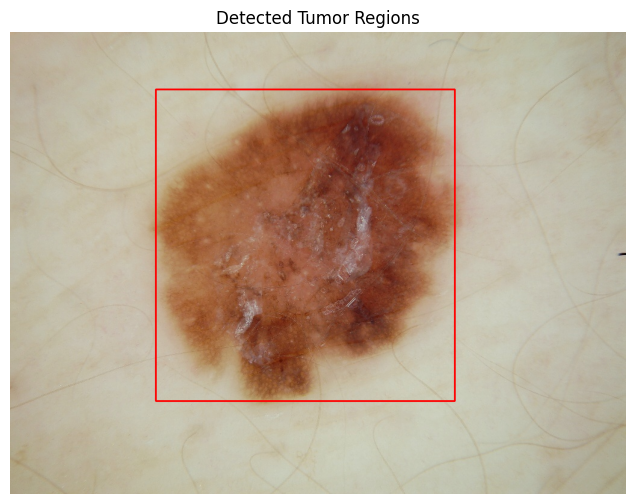

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = img_array
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply GaussianBlur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding to create a binary image
_, binary = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours and bounding boxes
output_image = image.copy()
for contour in contours:
    if cv2.contourArea(contour) > 100:  # Filter small contours
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue box

# Display the image
plt.figure(figsize=(10, 6))
plt.imshow(output_image)
plt.axis('off')
plt.title('Detected Tumor Regions')
plt.show()


In [29]:
new_array = np.reshape(new_array, (1, 500, 500, 3,))
prediction = model.predict([new_array])
print(classes[np.argmax(prediction)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
benign


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ixA0197B96GNZ_XLopeRVQcfyLoKuHXC
To: /content/ISIC_0001118.jpg
100% 629k/629k [00:00<00:00, 7.47MB/s]


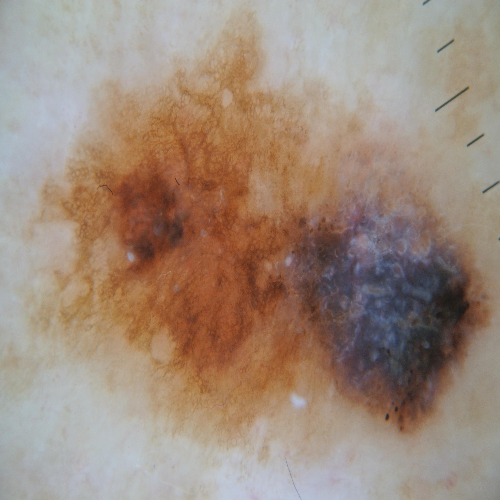

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Malignant


In [54]:

import cv2
from google.colab.patches import cv2_imshow
!gdown --id 1ixA0197B96GNZ_XLopeRVQcfyLoKuHXC

classes = ['Malignant', 'Benign']

img_array = cv2.imread("/content/ISIC_0001118.jpg")

new_array = cv2.resize(img_array, (500, 500))
cv2_imshow(new_array)
new_array = np.reshape(new_array, (1, 500, 500, 3,))
prediction = model.predict([new_array])
print(classes[np.argmax(prediction)])

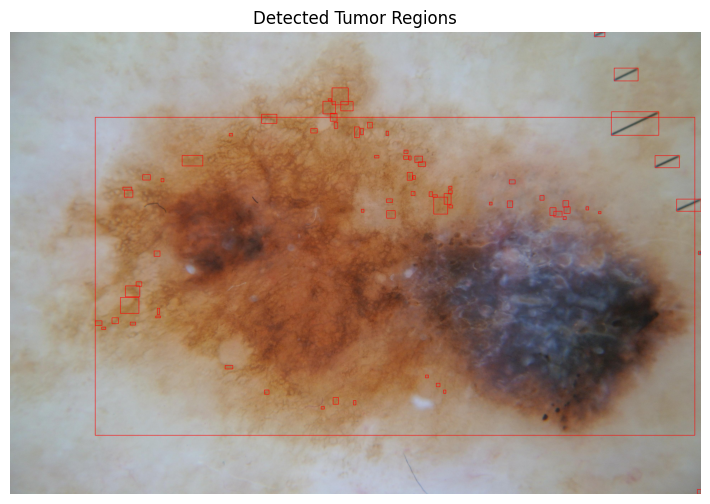

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = img_array
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply GaussianBlur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding to create a binary image
_, binary = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours and bounding boxes
output_image = image.copy()
for contour in contours:
    if cv2.contourArea(contour) > 100:  # Filter small contours
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue box

# Display the image
plt.figure(figsize=(10, 6))
plt.imshow(output_image)
plt.axis('off')
plt.title('Detected Tumor Regions')
plt.show()


In [55]:
new_array = np.reshape(new_array, (1, 500, 500, 3,))
prediction = model.predict([new_array])
print(classes[np.argmax(prediction)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Malignant
